# Support Vector Machines (Linear and Nonlinear Data)

Original code from [flippedcoder/probable-waddle](https://github.com/flippedcoder/probable-waddle/blob/master/svm_point_ex.py) by [flippedcoder](https://github.com/flippedcoder).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

## Linear Data

Make some data.

In [2]:
A = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
B = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

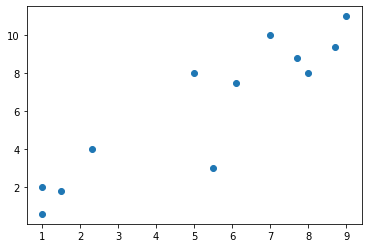

In [3]:
# show unclassified data
plt.scatter(A, B)
plt.show()

Transform data to vertical form to make it ready for SVM model. Add class labels.

In [4]:
# shaping data for training the model
X = np.vstack((A, B)).T
y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
X, y

(array([[ 1. ,  2. ],
        [ 5. ,  8. ],
        [ 1.5,  1.8],
        [ 8. ,  8. ],
        [ 1. ,  0.6],
        [ 9. , 11. ],
        [ 7. , 10. ],
        [ 8.7,  9.4],
        [ 2.3,  4. ],
        [ 5.5,  3. ],
        [ 7.7,  8.8],
        [ 6.1,  7.5]]),
 [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [5]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

# train the model
clf.fit(X, y)

print('Coefficients of features:', clf.coef_, 'Angle:', clf.intercept_)

Coefficients of features: [[0.1332713  0.42667492]] Angle: [-3.01308577]


Plot the hyper-plane that seperates both classes from each other.

- Plot the hyper-plane
- Plot the classes

No handles with labels found to put in legend.


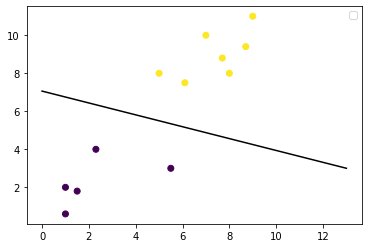

In [6]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')
# show the plot visually
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()
plt.show()

## Nonlinear Data

In [7]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    """
    Given the model, plots the decision boundary line for the data.
    """
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

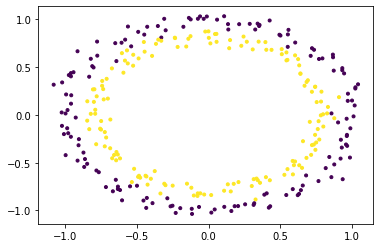

In [8]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [9]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

print('Coefficients of features:', clf.coef_, 'Angle:', clf.intercept_)

Coefficients of features: [[0.1332713  0.42667492]] Angle: [-3.01308577]


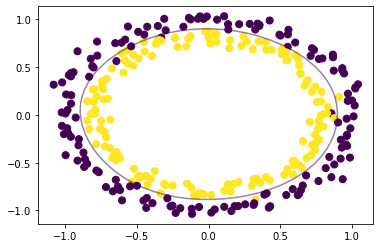

In [10]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()